In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import datetime

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cartopy.crs as ccrs
import cartopy
import sb_tools
from PIL import Image


In [2]:
import cartopy.feature as cfeature
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor=cfeature.COLORS['land'])
ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['water'])

In [3]:
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '13', 'color': 'black'}

# Load data

In [4]:
SB_env_df = pd.read_excel('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/SB_env_tromsøflaket2018.xlsx',header=0, engine="openpyxl")
SB_position = SB_env_df.set_index('datetime').resample('60min').mean()


In [5]:
SP_env_df = pd.read_csv('C:/Users/mbd/OneDrive - Akvaplan-niva AS/PhD-APN/ChaptersandExperiments/Tromsøflaket/SP_GPSExport.gps.csv', usecols=[1,2,4,5])
# Get hourly alues
SP_env_df['GPS_datetime']=pd.to_datetime(SP_env_df['GPS_date']+' '+SP_env_df['GPS_time'])
SP_position = SP_env_df.set_index('GPS_datetime').resample('60min').mean()


In [6]:
times = pd.date_range(start=SB_position.index[0], end=SB_position.index[-1], freq='H')

In [10]:
im = []
SB_ind = 1
SP_ind = 1

# Add SB track
for t_ind in np.arange(len(times)):
    
    # Find the index of the new time or use previous index.
    if np.any(SB_position.index==times[t_ind]):
        SB_ind = np.where(SB_position.index==times[t_ind])[0][0]
    if np.any(SP_position.index==times[t_ind]):
        SP_ind = np.where(SP_position.index==times[t_ind])[0][0]
    
    fig = plt.figure(figsize=(15,10))
    
    # create map
    sb_tools.plot_tromsoflaket(plt.axes, extent=)
    
    # Plot track up to time index
    plt.plot(SP_position['Longitude'][0:SP_ind],SP_position['Latitude'][0:SP_ind], '.-',color='green', label='Sailbuoy Tromsøflaket track',transform=ccrs.Geodetic())
    plt.plot(SP_position['Longitude'][SP_ind],SP_position['Latitude'][SP_ind], 'o',color='green', markersize=12,transform=ccrs.Geodetic())
    plt.plot(SB_position['longitude (deg)'][0:SB_ind],SB_position['latitude (deg)'][0:SB_ind], '.-',color='red', label='Sailbuoy Tromsøflaket track',transform=ccrs.Geodetic())
    plt.plot(SB_position['longitude (deg)'][SB_ind],SB_position['latitude (deg)'][SB_ind], '*',color='red', markersize=14,transform=ccrs.Geodetic())
    plt.text(16.2, 72, times[t_ind].strftime('%d %B %Y, %H:%M'), title_font)
    plt.legend()
    
    plt.savefig('figure%d.png' % t_ind)
    plt.close()

In [8]:
times[1].strftime('%d %B %Y, %H:%M')

'21 June 2018, 10:00'

I used ezgif.com and uploaded the series of pngs

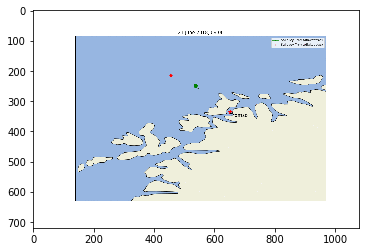

In [9]:
gif = mpimg.imread('SP_SB_survey.gif', 'r')
plt.imshow(gif)